# Seventh Exercise session

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
ts = pd.read_csv('./Dataset/shampoo.csv')

<AxesSubplot:>

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,NaN
4,1-05,180.3


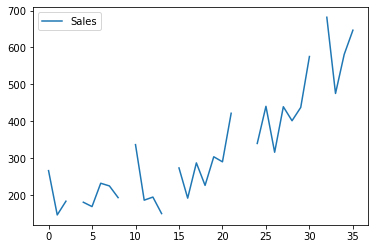

In [12]:
ts.plot()
ts.head()

The time series contain the sales of every day of each month.

There are some NaN values which imply the presence of holes in the plot. Depending on the method used to resolve the nulls values, we get different results.

The time series is ordered by day of the month.

## Interpolation

In [18]:
ts_interpolated = ts.interpolate()
ts_interpolated[2:5]

,Month,Sales
2,1-03,183.1
3,1-04,181.7
4,1-05,180.3


We can also substitute NaN values with interpolation only if they do not have other NaN values as neighbors, i.e. if they are between two non-null values. The number of consecutive NaN that can be substituted is given by the 'limit' parameter. In this case we have to tell the function in which direction we have to pick the NaN values to substitute with the interpolation when there are more consecutive values above the limit:

* 'forward': interlpolate the last NaN
* 'backward': interlpolate the first NaN

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

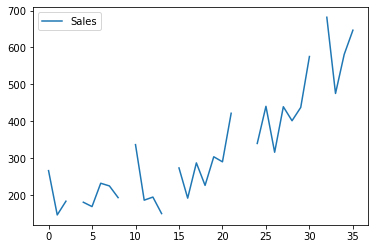

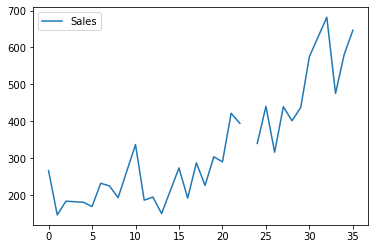

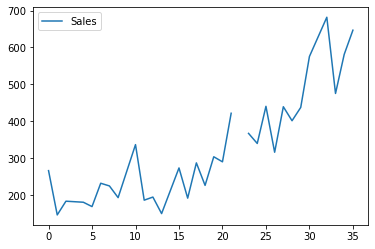

In [38]:
ts.plot()
ts_interpolated = ts.interpolate(limit=1, limit_direction='forward')
ts_interpolated.plot()
ts_interpolated = ts.interpolate(limit=1, limit_direction='backward')
ts_interpolated.plot()

## FFill

Filling the NaN with the value above. Since the time series is ordered by month we obtain that NaN values will be substituted with the sales of the previous month in the same day.

In [23]:
ts_ffill = ts.ffill()
ts_ffill[2:5]

,Month,Sales
2,1-03,183.1
3,1-04,183.1
4,1-05,180.3


## BFill

Filling the NaN with the value below. Since the time series is ordered by month we obtain that NaN values will be substituted with the sales of the successive month in the same day.

In [22]:
ts_bfill = ts.bfill()
ts_bfill[2:5]

,Month,Sales
2,1-03,183.1
3,1-04,180.3
4,1-05,180.3


## More complex functions

In [66]:
weather_data = pd.read_csv('./Dataset/weather_data_test.csv', 
                           parse_dates=['datetime'], 
                           sep=';',
                           decimal=',',
                           infer_datetime_format=True)
weather_data.T.head(17)

,0,1,2,3,4,5,6,7,8,9,...,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345
datetime,2015-09-03 00:00:00,2015-09-04 00:00:00,2015-09-05 00:00:00,2015-09-06 00:00:00,2015-09-07 00:00:00,2015-09-08 00:00:00,2015-09-10 00:00:00,2015-09-11 00:00:00,2015-09-12 00:00:00,2015-09-13 00:00:00,...,2019-05-12 00:00:00,2019-05-13 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00
T_mu,13.7375,14.825,14.275,13.125,12.0875,12.5375,13.0625,13.5375,14.75,15.1375,...,9.1125,8.679167,9.258333,10.1375,11.733333,13.783333,15.508333,16.595833,17.258333,18.433333
Po_mu,759.3625,758.175,752.7375,753.175,753.85,758.2625,771.775,776.2875,776.175,773.025,...,762.325,771.358333,772.308333,771.783333,771.645833,769.245833,766.175,763.275,761.470833,759.391667
P_mu,759.675,758.5125,753.0625,753.5125,754.1875,758.6125,772.1125,776.6125,776.5125,773.375,...,762.670833,771.7,772.654167,772.141667,771.979167,769.5875,766.5125,763.616667,761.804167,759.733333
Ff_mu,3.125,2.25,2.75,1.857143,3.75,4.625,1.875,2.375,3.0,3.25,...,4.541667,3.5,3.833333,3.375,2.5,1.833333,2.625,3.958333,3.5,2.333333
Tn_mu,12.75,12.7,13.0,11.25,11.15,9.9,10.55,11.6,12.75,13.9,...,5.75,5.7,7.0,8.3,9.3,10.5,12.6,13.95,14.85,15.6
Tx_mu,14.8,17.05,16.25,15.3,13.85,14.25,15.7,15.35,16.8,16.65,...,11.45,10.55,12.25,13.1,15.0,16.6,18.35,19.25,18.75,21.8
VV_mu,14.775,18.125,21.35,20.875,19.125,27.75,27.25,21.625,19.4375,26.375,...,25.758333,48.333333,44.75,42.416667,42.958333,40.5,41.666667,43.125,36.458333,30.583333
Td_mu,12.75,12.825,11.7625,11.6625,11.2125,8.8,9.225,11.725,12.075,9.475,...,6.683333,1.845833,0.375,-0.708333,0.870833,2.2,3.9,7.008333,10.033333,11.991667
T_var,2.105536,7.345,1.710714,5.679286,0.678393,6.522679,15.785536,6.614107,5.577143,0.61125,...,3.967228,6.727808,4.31558,8.308533,15.618841,14.795362,15.223406,7.622156,4.692101,7.862319


In [67]:
weather_data.shape

(1346, 17)

It contains weather data of Helsinky from September 2015 to May 2019.

We may focus only on the data stream of temperature.

In [73]:
weather_df = weather_data[['datetime', 'T_mu']]
weather_df.head()

,datetime,T_mu
0,2015-09-03,13.7375
1,2015-09-04,14.8250
2,2015-09-05,14.2750
3,2015-09-06,13.1250
4,2015-09-07,12.0875


Is very common, with data streams, to considers only most recently collected data, since very old data may be not relevant to us (e.g. the phenomenon we are considering is changed).

Hence we define a selection of the dataset:

In [74]:
selection = (weather_df['datetime'] >= '2016-01-01') & (weather_df['datetime'] <= '2019-05-21')
weather_df = weather_df.loc[selection]
weather_df.set_index('datetime', inplace = True) # set the date as index to obtain a time series
weather_df.shape
weather_df.head()

(1228, 1)

,T_mu
datetime,
2016-01-01,-4.5500
2016-01-02,-7.0000
2016-01-03,-8.7375
2016-01-04,-11.1750
2016-01-05,-17.6250


The rows are less than before so the selection of newer data was successful.

We can now see the property of the time series using the describe function:

,T_mu
count,1228.000000
mean,6.302811
std,8.433225
min,-22.675000
25%,0.559375
50%,5.227083
75%,13.784375
max,26.145833


<AxesSubplot:xlabel='datetime'>

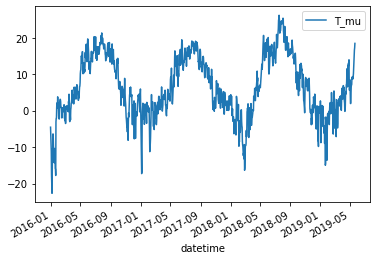

In [76]:
weather_df.describe()
weather_df.plot()

One useful check is to see when the max and the min values were detected (e.g. if the maximum/minimum temperature was detected during the winter/summer season then may be an error instead if detected during summer/winter it is reasonable).

In [77]:
weather_df.loc[weather_df['T_mu'] == max(weather_df['T_mu'])] # max temperature datetime

,T_mu
datetime,
2018-07-17,26.145833


In [79]:
weather_df.loc[weather_df['T_mu'] == min(weather_df['T_mu'])] # min temperature datetime

,T_mu
datetime,
2016-01-07,-22.675


With a time series is useful to plot it.

<Figure size 1600x1000 with 0 Axes>

<AxesSubplot:title={'center':'Daily Temperature from 2016 to 2019'}, xlabel='Date', ylabel='Degrees (Celsius)'>

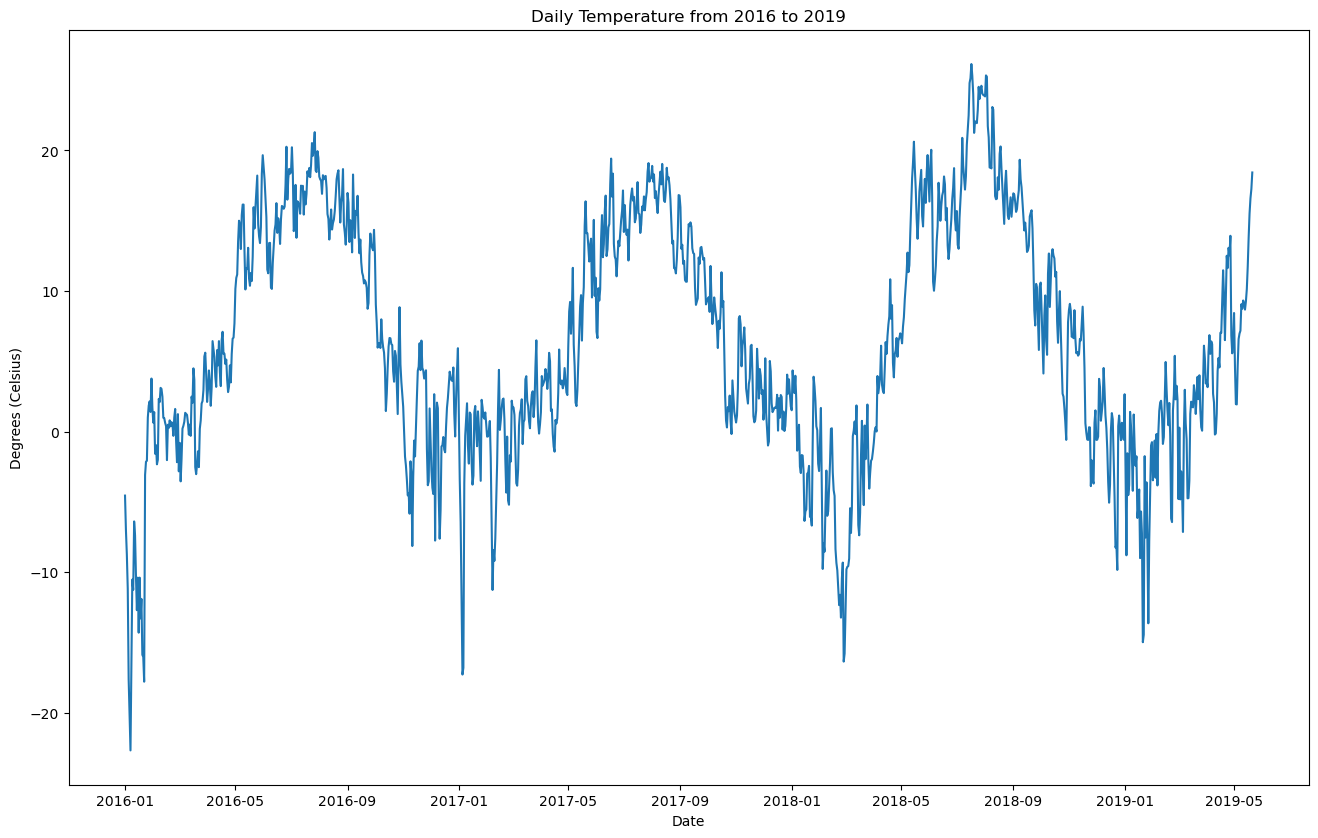

In [80]:
plt.figure(figsize=(16,10), dpi=100)
plt.gca(title='Daily Temperature from 2016 to 2019', xlabel='Date', ylabel='Degrees (Celsius)')
plt.plot(weather_df.index, weather_df.T_mu, color='tab:blue')

The differences between the day is not so high.

Usually with data streams we work in window, i.e. we are not interested in the small variations, but we want to have an idea of the trend, since for example we are interested to discover seasonality (i.e. patterns). 

Looking at the diagram we can clearly se a yearly pattern. 

To better visualize the time series usually is used a sliding window measuring the average of the window to have an approximation and to save memory, indeed all the variation in data may be not so relevant. This may produce a more clear trend that suffice for our needs. 

<AxesSubplot:xlabel='datetime'>

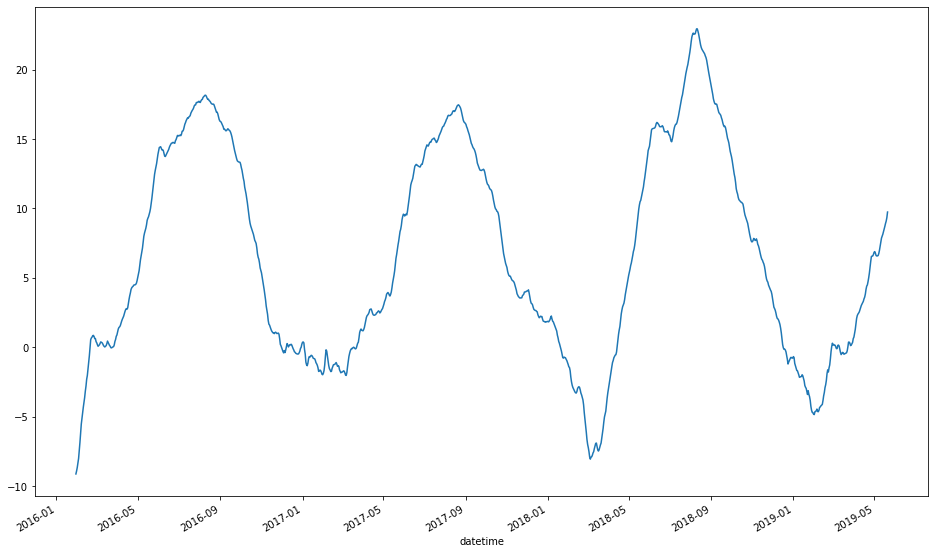

In [83]:
weather_df_mean = weather_df.T_mu.rolling(window=30).mean()
weather_df_mean.plot(figsize=(16, 10))

Hence we obtained an approximated time series, i.e. the average time series moving the window of length 30. With this plot we are able to better recognize strange behaviour, i.e. behaviour that do not respect the average behaviour.

Considering a smaller window the variation of the time series are much more:

<AxesSubplot:xlabel='datetime'>

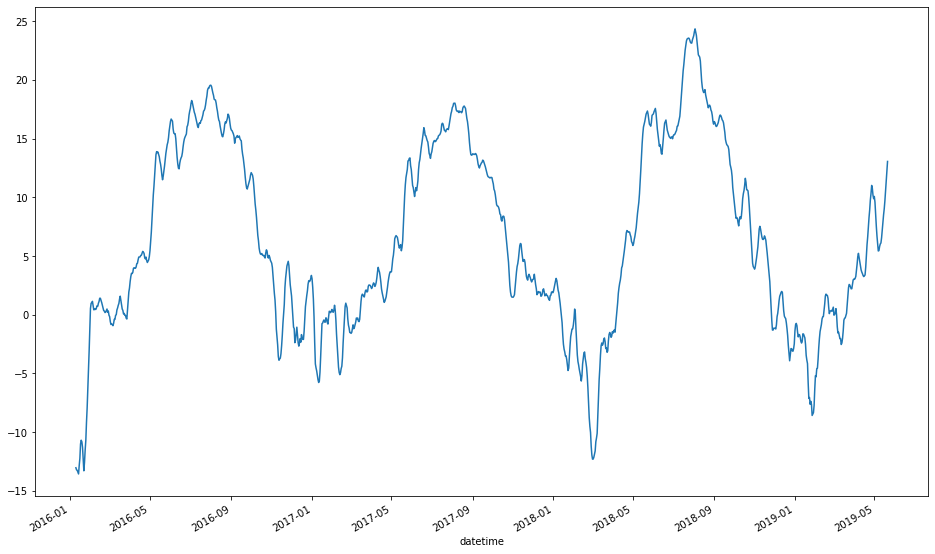

In [84]:
weather_df_mean = weather_df.T_mu.rolling(window=10).mean()
weather_df_mean.plot(figsize=(16, 10))

The size of the window depends on the phenomenon we are evaluating. If we are interested in keeping the variation of the phenomenon the window should be smaller. Instead  if we are only interested to capture the main trend the window size may be increased.

<AxesSubplot:xlabel='datetime'>

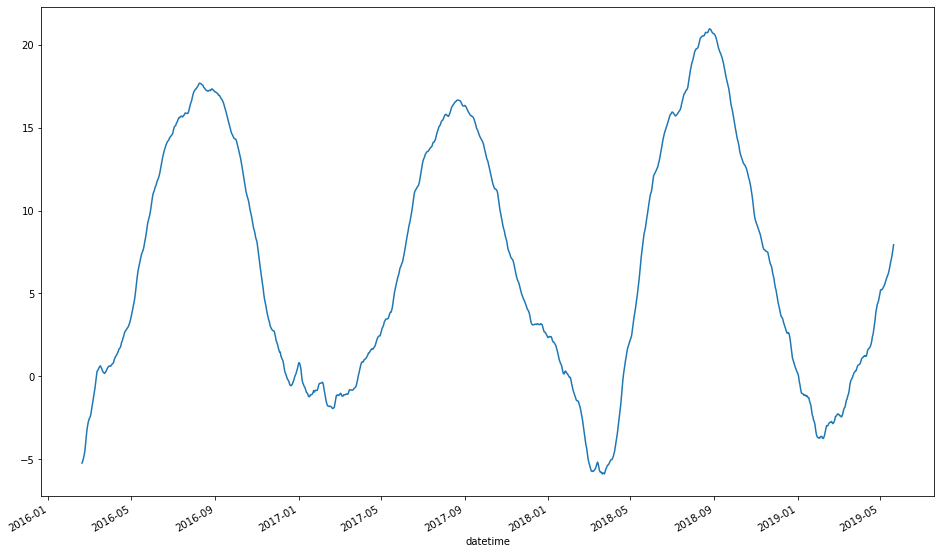

In [85]:
weather_df_mean = weather_df.T_mu.rolling(window=50).mean()
weather_df_mean.plot(figsize=(16, 10))

From the latter plot we could see how in 2016 and 2017 there is a seasonal trend that then changes. Then the pattern is similar but the variation of tempreratures have an higher slope and higher extremes.

Is very useful, when to the time series can be associated a seasonal trend, to decompose the signal in variables bacause if we can detect a trand then we can also detect a noise.

Indeed the variables that compose a time series are:

* trend
* seasonality
* noise

It is important to analize even the noise since it allow us to discover the outliers. 

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Additive Decomposition')

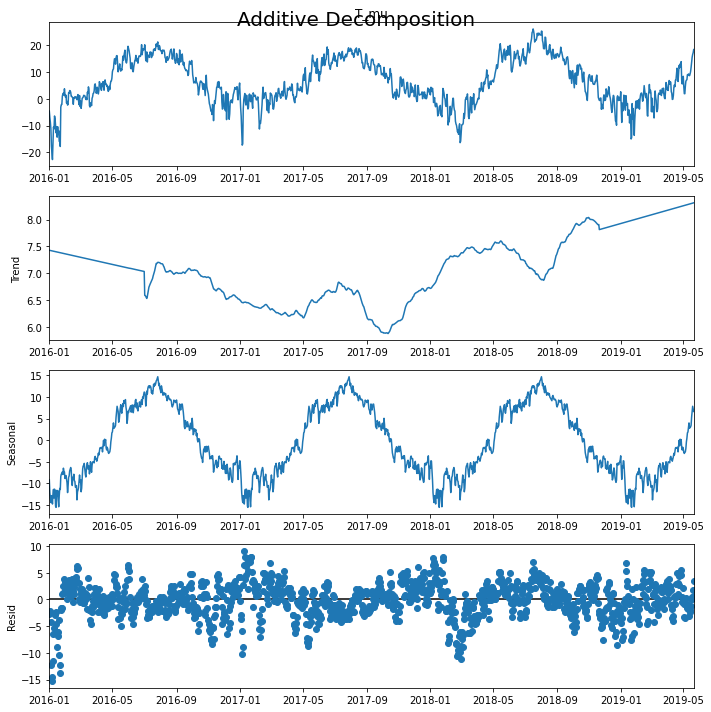

In [92]:
result_add = seasonal_decompose(weather_df.T_mu, model='additive', extrapolate_trend='freq', freq=365)
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=20)


There are 4 diagrams:

1. The signal   
2. The trend, which tell us if the values are incresing or decresing
3. The seasonal trend
4. The noise, i.e. the part of signal that disturb the seasonal pattern

i.e. we managed to plotted all the 3 components of the signal.

## Outliers

The outliers are taken from the noise (residual).

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

Just a method to find outliers:

In [95]:
outliers_fraction = float(.01)

scaler = StandardScaler()
np_scaled = scaler.fit_transform(weather_df.values.reshape(-1,1))
data = pd.DataFrame(np_scaled)
model = IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

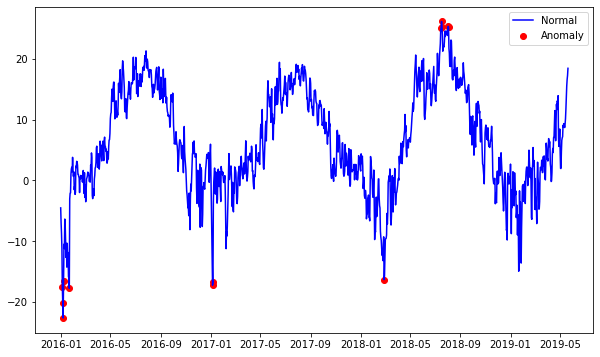

In [99]:
weather_df['anomaly'] = model.predict(data)
fig, ax = plt.subplots(figsize = (10,6))
a = weather_df.loc[weather_df['anomaly'] == -1, ['T_mu']]
ax.plot(weather_df.index, weather_df['T_mu'], color='blue', label='Normal')
ax.scatter(a.index, a['T_mu'], color='red', label='Anomaly')
plt.legend()

Here the maximum and minimal points are considered outliers with respect the average behaviour we have.

## Time series prediction

(Even if it not related to Data Quality) The main goal when we analyze a time series is to predict the future values.

There are many approaches to predict the next value. For example we can use the ARIMA model:

In [101]:
from statsmodels.tsa.arima.model import ARIMA

We fit the model

In [109]:
w = weather_df['T_mu']
model = ARIMA(w, order=(0, 0, 1))
model_fit = model.fit()

/home/alessio/anaconda3/envs/DataQuality/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [111]:
forecasting = model_fit.predict(len(w), len(w))
forecasting

1228    12.50853
dtype: float64

Where the index is meaningless but the new forcasted value is meaningful.